
Model Metrics:
                                     R2           MAE           MSE
Random Forest Regressor        0.972666   6803.691709  4.046723e+09
XGBoost Regressor              0.971310   9633.484170  4.247614e+09
Decision Tree Regressor        0.948595   8915.760008  7.610430e+09
Gradient Boosting Regressor    0.949726  17543.128847  7.443020e+09
AdaBoost Regressor             0.802667  61873.486286  2.921516e+10
K-Nearest Neighbors Regressor -0.059943  54840.510460  1.569243e+11
Elastic Net Regressor          0.081365  51799.429578  1.360036e+11
Ridge Regressor                0.065478  53773.708489  1.383558e+11

Comparison of Actual vs Predicted values:
         Actual  Random Forest Regressor Predicted  \
331434   2499.0                         3041.71000   
90107   30000.0                        28670.07000   
75707   25200.0                        19389.21872   
248615      6.0                            5.38000   
184119     16.0                           21.94500   

    

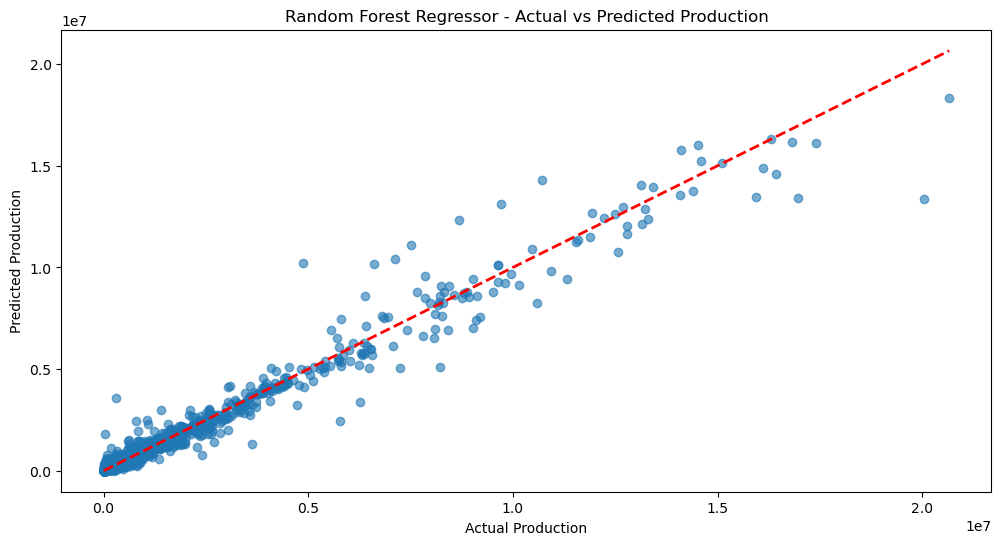

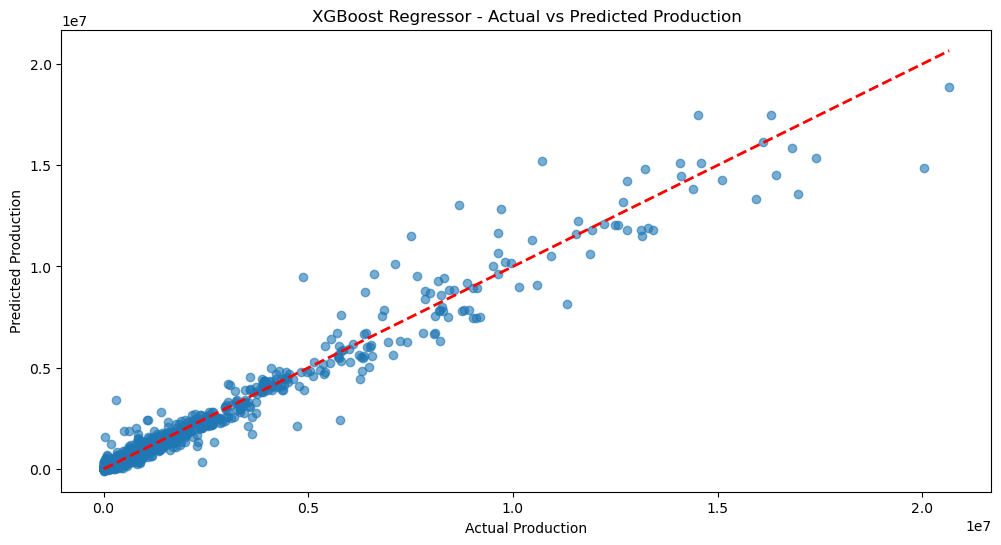

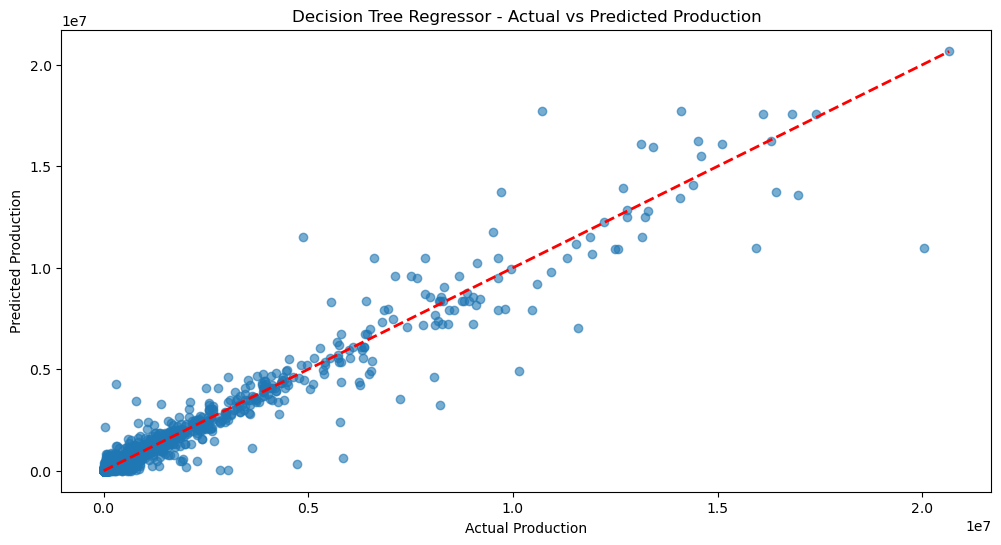

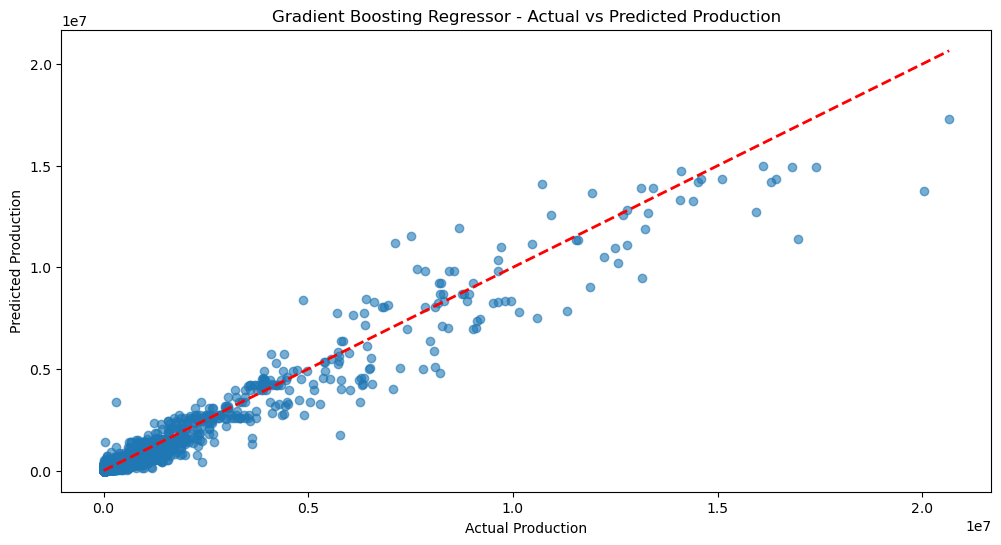

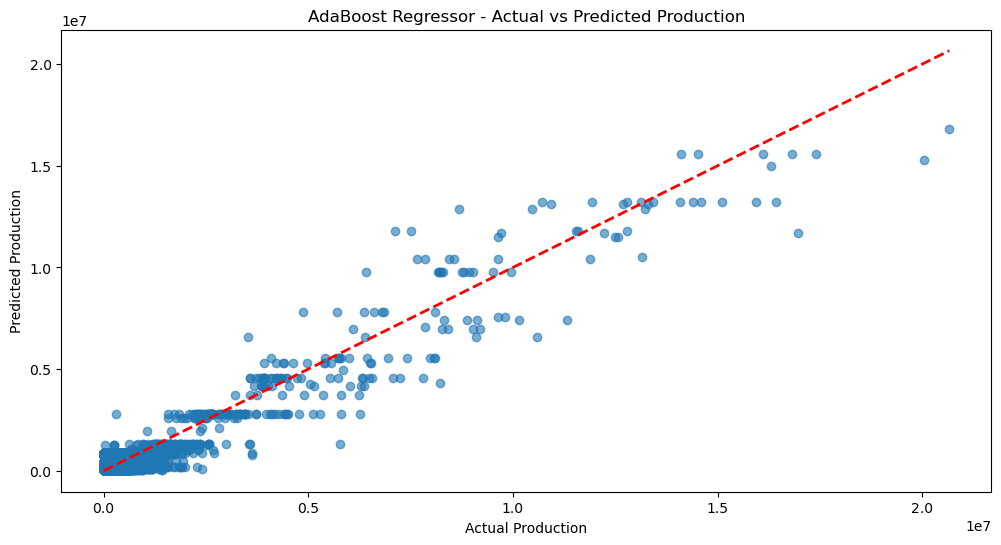

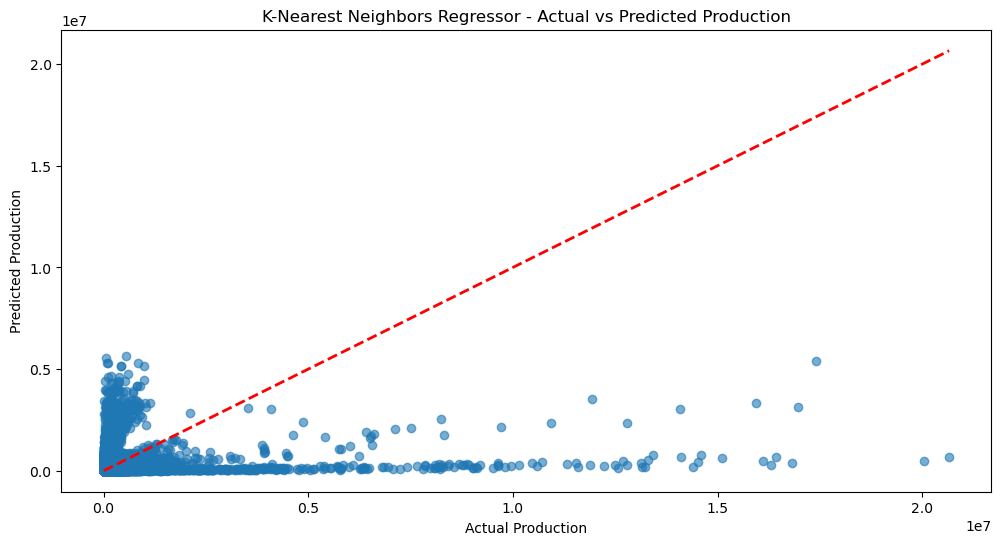

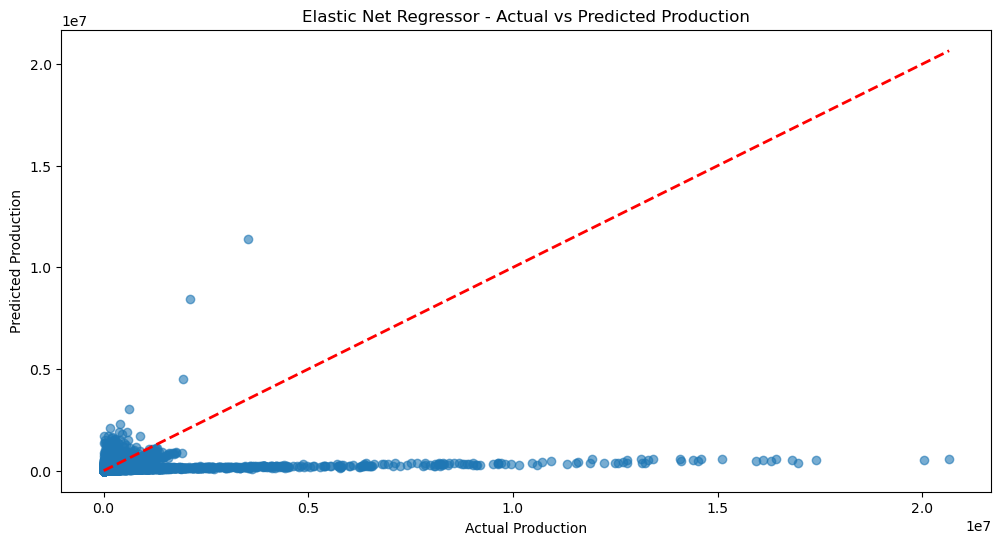

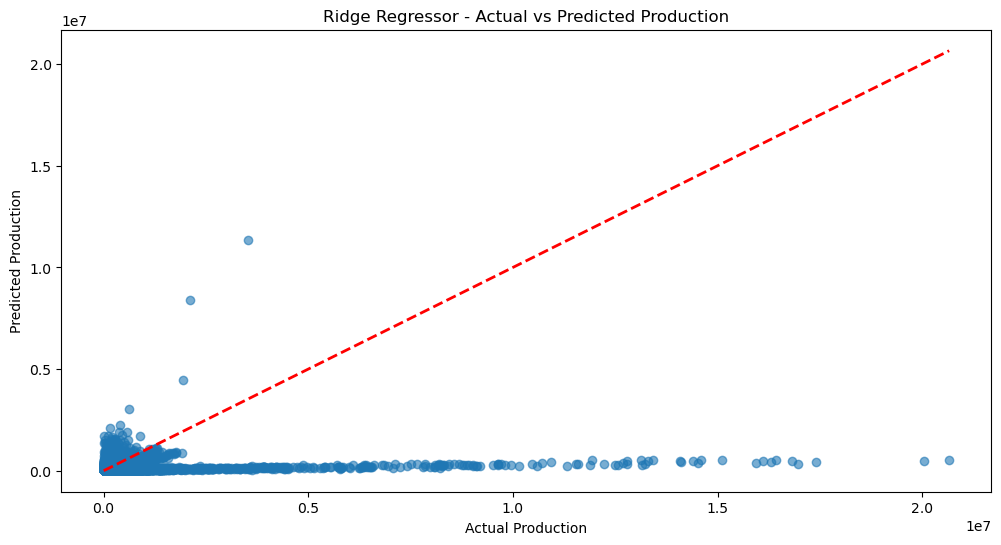

C:\Anaconda navigator\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the data
data = pd.read_csv("C:/Users/Jaydeep/OneDrive/Desktop/Final Crop project/crop_production.csv")

# Convert Year to a numeric format
data['Year'] = data['Year'].apply(lambda x: int(x.split('-')[0]))  # Keep only the start year

# Remove rows with any null values
data_cleaned = data.dropna()

# Define features and target variable
X = data_cleaned[['State', 'District', 'Crop', 'Season', 'Area', 'Year']]
y = data_cleaned['Production']

# Handle categorical and numerical features
categorical_features = ['State', 'District', 'Crop', 'Season']
numeric_features = ['Area', 'Year']

# Create preprocessing pipelines for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model file paths
model_files = {
    'Random Forest Regressor': 'random_forest_regressor11.joblib',
    'XGBoost Regressor': 'xgb_model11.joblib',
    'Decision Tree Regressor': 'decision_tree_regressor11.joblib',
    'Gradient Boosting Regressor': 'gradient_boosting_regressor_model11.joblib',
    'AdaBoost Regressor': 'adaboost_regressor_model11.joblib',
    'K-Nearest Neighbors Regressor': 'k-nearest_neighbors_regressor_model11.joblib',
    'Elastic Net Regressor': 'elastic_net_regressor_model11.joblib',
    'Ridge Regressor': 'ridge_regressor_model11.joblib'
}

# Load the models
loaded_models = {name: joblib.load(file) for name, file in model_files.items()}

# Make predictions
predictions = {name: model.predict(X_test) for name, model in loaded_models.items()}

# Calculate performance metrics
def calculate_metrics(y_true, y_pred):
    return {
        'R2': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred)
    }

metrics = {name: calculate_metrics(y_test, pred) for name, pred in predictions.items()}

# Create a DataFrame to compare Actual vs Predicted for all models
comparison_df = pd.DataFrame({
    'Actual': y_test,
    **{f'{name} Predicted': preds for name, preds in predictions.items()}
})

# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics).T
metrics_df.columns = ['R2', 'MAE', 'MSE']

# Print metrics table
print("\nModel Metrics:")
print(metrics_df)

# Print comparison of Actual vs Predicted values
print("\nComparison of Actual vs Predicted values:")
print(comparison_df.head())

# Plotting Actual vs Predicted for each model
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(12, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Production')
    plt.ylabel('Predicted Production')
    plt.title(f'{model_name} - Actual vs Predicted Production')
    plt.show()

for name, pred in predictions.items():
    plot_actual_vs_predicted(y_test, pred, name)

# Plotting Residual Distributions for each model
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(12, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'{model_name} - Residual Distribution')
    plt.show()

for name, pred in predictions.items():
    plot_residuals(y_test, pred, name)
